# BASICS 01 - Spatiotemporal Surfaces

In [40]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/antoine/homhots/HOTS/HOTS


In [41]:
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import time

from mix_TimeSurface import *

datapath = "../Data/alphabet_ExtractedStabilized.mat"

In [42]:
    #Extracted from past code (vic_Event.py) 
    import scipy
    def LoadFromMat(path, image_number, OutOnePolarity=False, verbose=0):
        '''
        Load Events from a .mat file. Only the events contained in ListPolarities are kept:
        INPUT
            + path : a string which is the path of the .mat file (ex : './data_cache/alphabet_ExtractedStabilized.mat')
            + image_number : list with all the numbers of image to load
        '''
        obj = scipy.io.loadmat(path)
        ROI = obj['ROI'][0]

        if type(image_number) is int:
            image_number = [image_number]
        elif type(image_number) is not list:
            raise TypeError(
                'the type of argument image_number should be int or list')
        if verbose > 0:
            print("loading images {0}".format(image_number))
        Total_size = 0
        for idx, each_image in enumerate(image_number):
            image = ROI[each_image][0, 0]
            Total_size += image[1].shape[1]

        address = np.zeros((Total_size, 2)).astype(int)
        time = np.zeros((Total_size))
        polarity = np.zeros((Total_size))
        first_idx = 0

        for idx, each_image in enumerate(image_number):
            image = ROI[each_image][0, 0]
            last_idx = first_idx + image[0].shape[1]
            address[first_idx:last_idx, 0] = (image[1] - 1).astype(int)
            address[first_idx:last_idx, 1] = (image[0] - 1).astype(int)
            time[first_idx:last_idx] = (image[3] * 1e-6)
            polarity[first_idx:last_idx] = image[2].astype(int)
            first_idx = last_idx

        polarity[polarity.T == -1] = 0
        polarity = polarity.astype(int)
        # Filter only the wanted polarity
        ListPolarities = np.unique(polarity)
        if OutOnePolarity == True:
            polarity = np.zeros_like(polarity)
            ListPolarities = [0]
            
        return address, time, polarity, ListPolarities

# Loading the events

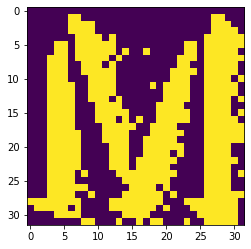

In [43]:
sensor_size = [32,32]
stop_indice = 20000

add, t, p, polz = LoadFromMat(datapath,image_number=15)

pixgridON = np.zeros([sensor_size[0], sensor_size[1]])
pixgridOFF = np.zeros([sensor_size[0], sensor_size[1]])
for i in range(stop_indice):
    if p[i]==1:
        pixgridON[add[i,0],add[i,1]]=1
    else: 
        pixgridOFF[add[i,0],add[i,1]]=1
plt.imshow(pixgridON);

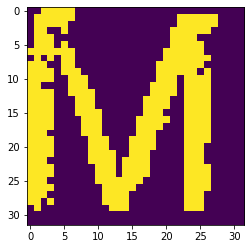

In [44]:
plt.imshow(pixgridOFF);

# Creating the SpatioTemporal Surface

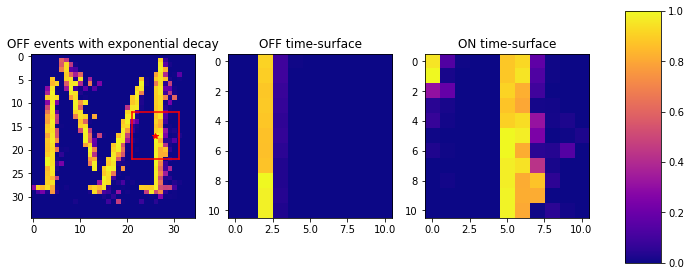

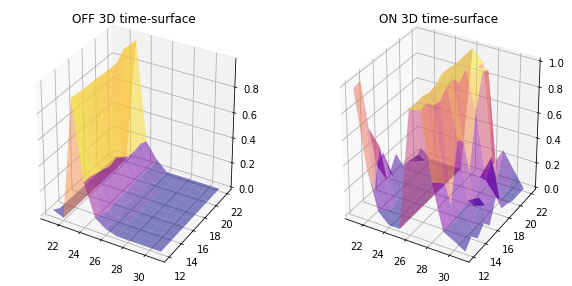

In [45]:
target_event = 20000
SpTe = TimeSurface(R=5,tau=0.02,camsize=[34,34], sigma=1)
i = 0
while i<target_event+1:
    TS, activ = SpTe.addevent(add[i,1],add[i,0],t[i], p[i])
    i+=1
    
SpTe.plote()

SpTe.plot3D()

## Testing a bigger $\tau$

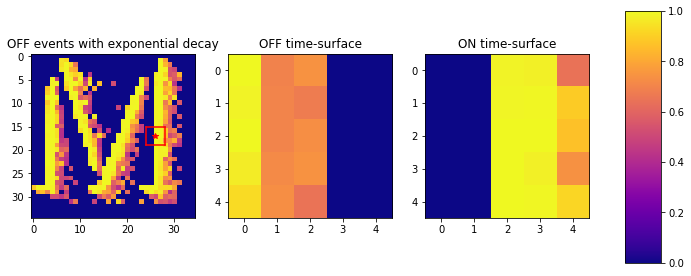

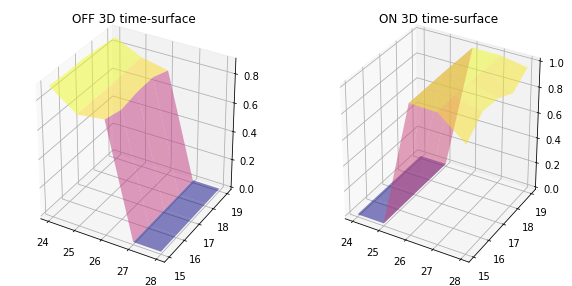

In [46]:
target_event = 20000
SpTe2 = TimeSurface(R=2,tau=0.2,camsize=[34,34])
i = 0
while i<target_event+1:
    TS, activ = SpTe2.addevent(add[i,1],add[i,0],t[i], p[i])
    i+=1
    
SpTe2.plote()

SpTe2.plot3D()

# With tonic

In [47]:
import tonic
learningset = tonic.datasets.NMNIST(save_to='../Data/',
                                train=False,
                                transform=None)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


In [48]:
loader = tonic.datasets.DataLoader(learningset, shuffle=True)

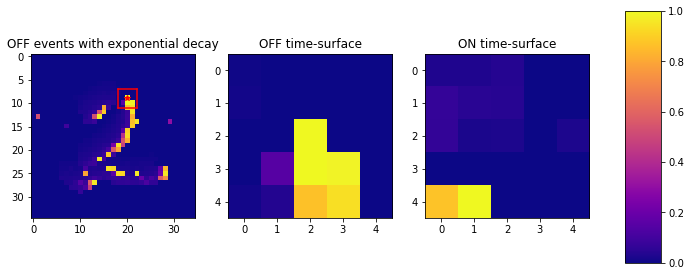

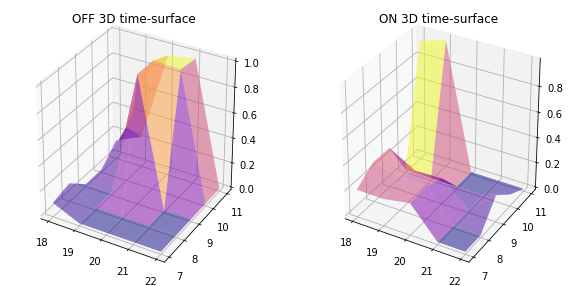

In [52]:
target_event = 2000
SpTetonic = TimeSurface(R=2,tau=5*10e3,camsize=[34,34])
events, target = next(iter(loader))
print(events.size())
iev = 0
while iev<target_event:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
                events[0][iev][learningset.ordering.find("y")].item(), \
                events[0][iev][learningset.ordering.find("t")].item(), \
                events[0][iev][learningset.ordering.find("p")].item(),
    TS, activ = SpTetonic.addevent(x,y,t,p)
    iev+=1
    
SpTetonic.plote()

SpTetonic.plot3D()

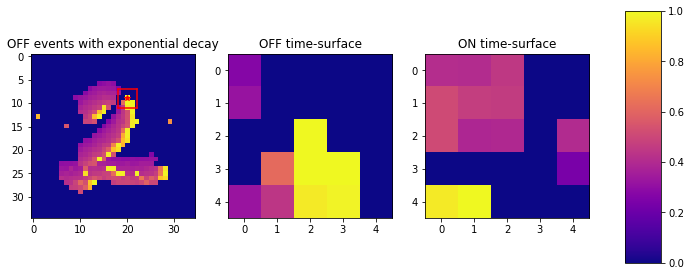

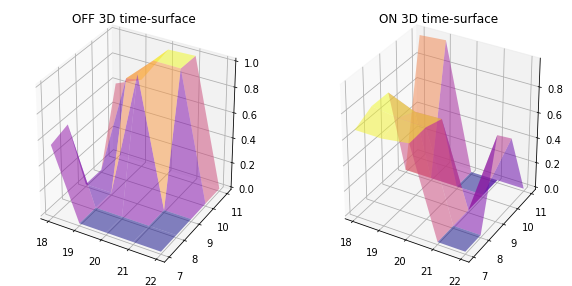

In [53]:
iev = 0
SpTetonic = TimeSurface(R=2,tau=20*10e3,camsize=[34,34])
while iev<target_event:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
                events[0][iev][learningset.ordering.find("y")].item(), \
                events[0][iev][learningset.ordering.find("t")].item(), \
                events[0][iev][learningset.ordering.find("p")].item(),
    TS, activ = SpTetonic.addevent(x,y,t,p)
    iev+=1
    
SpTetonic.plote()

SpTetonic.plot3D()